In [1]:
import random
import numpy as np
import pandas as pd
from itertools import combinations

from card import Card

In [2]:
df_winrate = pd.read_csv("startinghands_winrate.csv")

In [3]:
df_winrate[60:70]

SH     1     2     3     4     5     6     7     8     9
60  Q6o  51.1  32.3  23.2  17.9  14.4  12.0  10.1   8.8   7.6
61  Q5s  52.9  34.9  26.3  21.4  18.1  15.8  14.1  12.7  11.6
62  Q5o  50.2  31.3  22.3  17.3  13.9  11.6   9.8   8.5   7.4
63  Q4s  51.7  33.9  25.5  20.7  17.6  15.4  13.7  12.4  11.3
64  Q4o  49.0  30.2  21.4  16.4  13.3  11.0   9.4   8.1   7.1
65  Q3s  50.7  33.0  24.7  20.1  17.0  14.9  13.3  12.1  11.1
66  Q3o  47.9  29.2  20.7  15.9  12.8  10.7   9.1   7.9   6.9
67  Q2s  49.9  32.2  24.0  19.5  16.6  14.6  13.1  11.9  10.9
68  Q2o  47.0  28.4  19.9  15.3  12.3  10.3   8.8   7.7   6.8
69   JJ  77.5  61.2  49.2  40.3  33.6  28.5  24.6  21.6  19.3

In [4]:
df_winrate[df_winrate['SH'] == "KQs"]

SH     1     2     3     4     5     6     7     8     9
26  KQs  63.4  47.1  38.2  32.5  28.3  25.1  22.5  20.4  18.6

In [84]:
N = 1
RANK_TO_STRING = {2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'T', 11: 'J', 12: 'Q', 13: 'K', 14: 'A'}
win_rate = np.array([['' for _ in range(13)] for _ in range(13)], dtype=object)

for i in range(13):
    for j in range(13):
        if i < j:
            SH = RANK_TO_STRING[14-i] + RANK_TO_STRING[14-j] + "s"
        elif i > j:
            SH = RANK_TO_STRING[14-j] + RANK_TO_STRING[14-i] + "o"
        else:
            SH = RANK_TO_STRING[14-i] + RANK_TO_STRING[14-i]
        win_rate[i][j] = df_winrate[df_winrate['SH'] == SH]["{}".format(N)].values[0]

win_rate = win_rate.astype("float32")
df = pd.DataFrame(win_rate,
                  columns=['A','K','Q','J','T','9','8','7','6','5','4','3','2'],
                  index=['A','K','Q','J','T','9','8','7','6','5','4','3','2'])
df

A          K          Q          J          T          9  \
A  85.300003  67.000000  66.099998  65.400002  64.699997  63.000000   
K  65.400002  82.400002  63.400002  62.599998  61.900002  60.000000   
Q  64.500000  61.400002  79.900002  60.299999  59.500000  57.900002   
J  63.599998  60.599998  58.200001  77.500000  57.500000  55.799999   
T  62.900002  59.900002  57.400002  55.400002  75.099998  54.299999   
9  60.900002  58.000000  55.500000  53.400002  51.700001  72.099998   
8  60.099998  56.299999  53.799999  51.700001  50.000000  48.400002   
7  59.099998  55.400002  51.900002  49.900002  48.200001  46.700001   
6  57.799999  54.299999  51.099998  47.900002  46.299999  44.900002   
5  57.700001  53.299999  50.200001  47.099998  44.200001  42.900002   
4  56.400002  52.099998  49.000000  46.099998  43.400002  40.700001   
3  55.599998  51.200001  47.900002  45.000000  42.400002  39.900002   
2  54.599998  50.200001  47.000000  44.000000  41.500000  38.900002   

           8          7          6          5          4          3          2  
A  62.099998  61.099998  60.000000  59.900002  58.900002  58.000000  57.000000  
K  58.500000  57.799999  56.799999  55.799999  54.700001  53.799999  52.900002  
Q  56.200001  54.500000  53.799999  52.900002  51.700001  50.700001  49.900002  
J  54.200001  52.400002  50.799999  50.000000  49.000000  47.900002  47.099998  
T  52.599998  51.000000  49.200001  47.200001  46.400002  45.500000  44.700001  
9  51.099998  49.500000  47.700001  45.900002  43.799999  43.200001  42.299999  
8  69.099998  48.200001  46.500000  44.799999  42.700001  40.799999  40.299999  
7  45.500000  66.199997  45.700001  43.799999  41.799999  40.000000  38.099998  
6  43.599998  42.700001  63.299999  43.200001  41.400002  39.400002  37.500000  
5  41.700001  40.799999  40.099998  60.299999  41.099998  39.299999  37.500000  
4  39.599998  38.599998  38.000000  37.900002  57.000000  38.000000  36.299999  
3  37.500000  36.599998  35.900002  35.799999  34.400002  53.700001  35.099998  
2  36.799999  34.599998  34.000000  33.900002  32.500000  31.200001  50.299999

In [143]:
df.style.background_gradient("bone", axis=0, low=0)

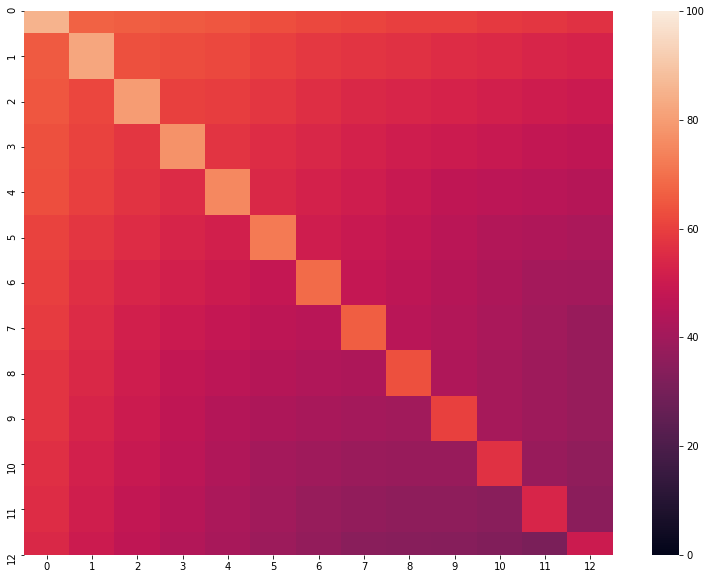

In [164]:
plt.figure(figsize=(14,10))
sns.heatmap(win_rate, vmin=0, vmax=100, square=True)
plt.show()

In [195]:
df

A          K          Q          J          T          9  \
A  85.300003  67.000000  66.099998  65.400002  64.699997  63.000000   
K  65.400002  82.400002  63.400002  62.599998  61.900002  60.000000   
Q  64.500000  61.400002  79.900002  60.299999  59.500000  57.900002   
J  63.599998  60.599998  58.200001  77.500000  57.500000  55.799999   
T  62.900002  59.900002  57.400002  55.400002  75.099998  54.299999   
9  60.900002  58.000000  55.500000  53.400002  51.700001  72.099998   
8  60.099998  56.299999  53.799999  51.700001  50.000000  48.400002   
7  59.099998  55.400002  51.900002  49.900002  48.200001  46.700001   
6  57.799999  54.299999  51.099998  47.900002  46.299999  44.900002   
5  57.700001  53.299999  50.200001  47.099998  44.200001  42.900002   
4  56.400002  52.099998  49.000000  46.099998  43.400002  40.700001   
3  55.599998  51.200001  47.900002  45.000000  42.400002  39.900002   
2  54.599998  50.200001  47.000000  44.000000  41.500000  38.900002   

           8          7          6          5          4          3          2  
A  62.099998  61.099998  60.000000  59.900002  58.900002  58.000000  57.000000  
K  58.500000  57.799999  56.799999  55.799999  54.700001  53.799999  52.900002  
Q  56.200001  54.500000  53.799999  52.900002  51.700001  50.700001  49.900002  
J  54.200001  52.400002  50.799999  50.000000  49.000000  47.900002  47.099998  
T  52.599998  51.000000  49.200001  47.200001  46.400002  45.500000  44.700001  
9  51.099998  49.500000  47.700001  45.900002  43.799999  43.200001  42.299999  
8  69.099998  48.200001  46.500000  44.799999  42.700001  40.799999  40.299999  
7  45.500000  66.199997  45.700001  43.799999  41.799999  40.000000  38.099998  
6  43.599998  42.700001  63.299999  43.200001  41.400002  39.400002  37.500000  
5  41.700001  40.799999  40.099998  60.299999  41.099998  39.299999  37.500000  
4  39.599998  38.599998  38.000000  37.900002  57.000000  38.000000  36.299999  
3  37.500000  36.599998  35.900002  35.799999  34.400002  53.700001  35.099998  
2  36.799999  34.599998  34.000000  33.900002  32.500000  31.200001  50.299999

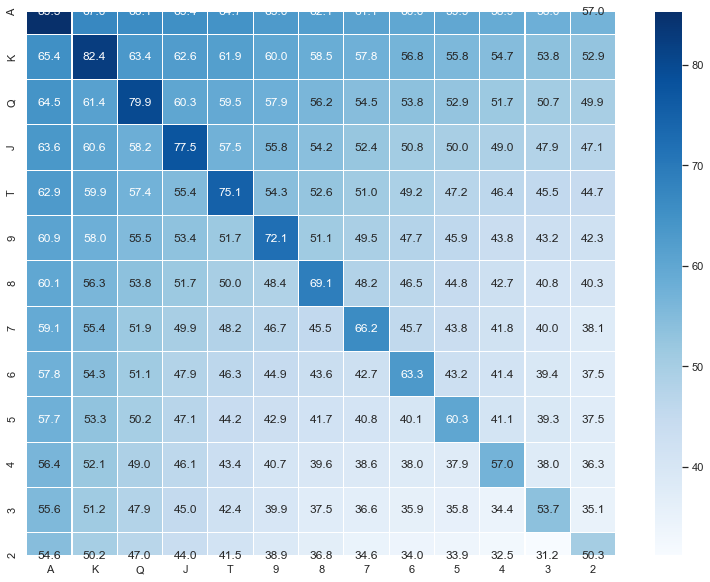

In [194]:
plt.figure(figsize=(14, 10))

sns.heatmap(df, 
            vmin=df.min().values.min(), vmax=df.max().values.max(), 
            annot=True, fmt=".1f", 
            square=True, cmap="Blues", linewidths=.1)
plt.show()

85.3

In [7]:
RANK_TO_STRING = {2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'T', 11: 'J', 12: 'Q', 13: 'K', 14: 'A'}
sh = np.array([['' for _ in range(13)] for _ in range(13)], dtype=object)

for i in range(13):
    for j in range(13):
        if i < j:
            SH = RANK_TO_STRING[14-i] + RANK_TO_STRING[14-j] + "s"
        elif i > j:
            SH = RANK_TO_STRING[14-j] + RANK_TO_STRING[14-i] + "o"
            
        else:
            SH = RANK_TO_STRING[14-i] + RANK_TO_STRING[14-i]
        sh[i][j] = SH

df = pd.DataFrame(sh,
                  columns=['A','K','Q','J','T','9','8','7','6','5','4','3','2'],
                  index=['A','K','Q','J','T','9','8','7','6','5','4','3','2'])
df

A    K    Q    J    T    9    8    7    6    5    4    3    2
A   AA  AKs  AQs  AJs  ATs  A9s  A8s  A7s  A6s  A5s  A4s  A3s  A2s
K  AKo   KK  KQs  KJs  KTs  K9s  K8s  K7s  K6s  K5s  K4s  K3s  K2s
Q  AQo  KQo   QQ  QJs  QTs  Q9s  Q8s  Q7s  Q6s  Q5s  Q4s  Q3s  Q2s
J  AJo  KJo  QJo   JJ  JTs  J9s  J8s  J7s  J6s  J5s  J4s  J3s  J2s
T  ATo  KTo  QTo  JTo   TT  T9s  T8s  T7s  T6s  T5s  T4s  T3s  T2s
9  A9o  K9o  Q9o  J9o  T9o   99  98s  97s  96s  95s  94s  93s  92s
8  A8o  K8o  Q8o  J8o  T8o  98o   88  87s  86s  85s  84s  83s  82s
7  A7o  K7o  Q7o  J7o  T7o  97o  87o   77  76s  75s  74s  73s  72s
6  A6o  K6o  Q6o  J6o  T6o  96o  86o  76o   66  65s  64s  63s  62s
5  A5o  K5o  Q5o  J5o  T5o  95o  85o  75o  65o   55  54s  53s  52s
4  A4o  K4o  Q4o  J4o  T4o  94o  84o  74o  64o  54o   44  43s  42s
3  A3o  K3o  Q3o  J3o  T3o  93o  83o  73o  63o  53o  43o   33  32s
2  A2o  K2o  Q2o  J2o  T2o  92o  82o  72o  62o  52o  42o  32o   22

In [41]:
win_rate.shape

(13, 13)

In [8]:
win_rate

array([[85.3, 67.0, 66.1, 65.4, 64.7, 63.0, 62.1, 61.1, 60.0, 59.9, 58.9,
        58.0, 57.0],
       [65.4, 82.4, 63.4, 62.6, 61.9, 60.0, 58.5, 57.8, 56.8, 55.8, 54.7,
        53.8, 52.9],
       [64.5, 61.4, 79.9, 60.3, 59.5, 57.9, 56.2, 54.5, 53.8, 52.9, 51.7,
        50.7, 49.9],
       [63.6, 60.6, 58.2, 77.5, 57.5, 55.8, 54.2, 52.4, 50.8, 50.0, 49.0,
        47.9, 47.1],
       [62.9, 59.9, 57.4, 55.4, 75.1, 54.3, 52.6, 51.0, 49.2, 47.2, 46.4,
        45.5, 44.7],
       [60.9, 58.0, 55.5, 53.4, 51.7, 72.1, 51.1, 49.5, 47.7, 45.9, 43.8,
        43.2, 42.3],
       [60.1, 56.3, 53.8, 51.7, 50.0, 48.4, 69.1, 48.2, 46.5, 44.8, 42.7,
        40.8, 40.3],
       [59.1, 55.4, 51.9, 49.9, 48.2, 46.7, 45.5, 66.2, 45.7, 43.8, 41.8,
        40.0, 38.1],
       [57.8, 54.3, 51.1, 47.9, 46.3, 44.9, 43.6, 42.7, 63.3, 43.2, 41.4,
        39.4, 37.5],
       [57.7, 53.3, 50.2, 47.1, 44.2, 42.9, 41.7, 40.8, 40.1, 60.3, 41.1,
        39.3, 37.5],
       [56.4, 52.1, 49.0, 46.1, 43.4, 40.7, 39.6, 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


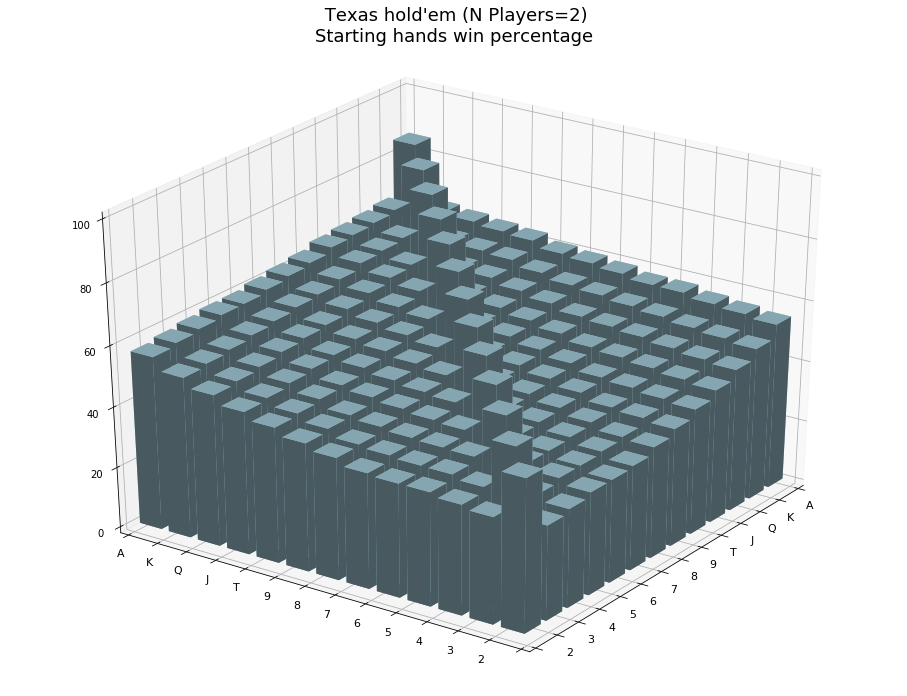

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline


# setup the figure and axes
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection='3d')
    
# fake data
_x = np.arange(13)
_y = np.arange(13)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
z = np.zeros(13*13)

dz = win_rate.ravel()
dx = dy = 0.75

color = 'lightblue'
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=color, alpha=1)
ax.set_title(' Texas hold\'em (N Players=2)\nStarting hands win percentage\n\n', fontsize=18)
ax.view_init(azim=35) # Set rotation angle to 30 degrees
ax.set_xticks(np.arange(14))
ax.set_yticks(np.arange(14))
ax.set_xticklabels(['A','K','Q','J','T','9','8','7','6','5','4','3','2'], fontsize=11)
ax.set_yticklabels(['A','K','Q','J','T','9','8','7','6','5','4','3','2'], fontsize=11)
ax.set_xlim(0,13)
ax.set_ylim(0,13)
ax.set_zlim(0,100)

print(ax.get_yticks())


plt.show()

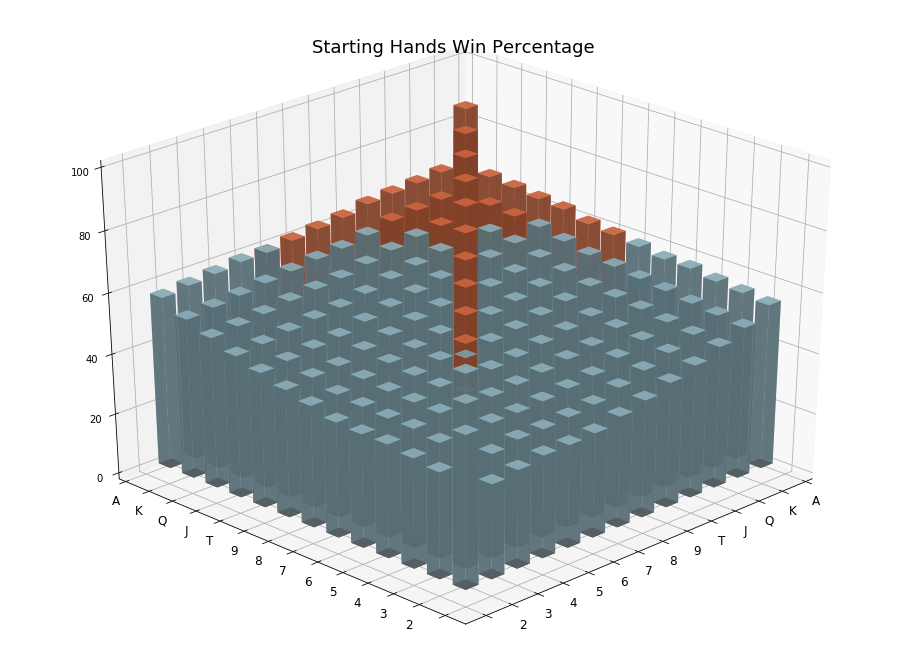

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%matplotlib inline

# setup the figure and axes
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection='3d')
    
# fake data
_x = np.arange(13)
_y = np.arange(13)
_xx, _yy = np.meshgrid(_x, _y)

x = _xx.ravel()
y = _yy.ravel()
z = np.zeros(13*13)

dx = 0.5
dy = 0.5
win_rate_clip = 60.0

dz = np.where(win_rate >  win_rate_clip, 0.0, win_rate).flatten()
color = 'lightblue'
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=color, alpha=0.75)

dx = 0.5
dy = 0.5

dz = np.where(win_rate < win_rate_clip, 0.0, win_rate).flatten()
color = 'coral'
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=color, alpha=0.75)

ax.set_xticks(np.arange(14))
ax.set_yticks(np.arange(14))
ax.set_xticklabels(['A','K','Q','J','T','9','8','7','6','5','4','3','2'], fontsize=12)
ax.set_yticklabels(['A','K','Q','J','T','9','8','7','6','5','4','3','2'], fontsize=12)
ax.set_xlim(0,13.5)
ax.set_ylim(0,13.5)
ax.set_zlim(0,100)
ax.set_title('Starting Hands Win Percentage', fontsize=18)
ax.view_init(azim=45) # Set rotation angle to 35 degrees

plt.show()

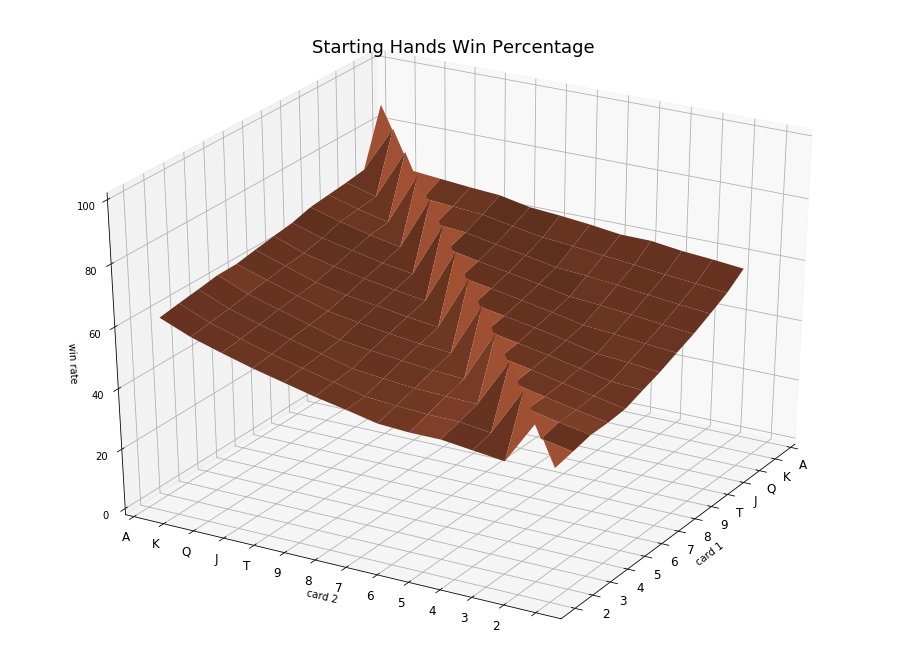

In [156]:
def f(x, y):
    return win_rate[x][y].astype(np.float32)

x = np.arange(13)
y = np.arange(13)
Z = f(x, y)
X, Y = np.meshgrid(x, y)

# setup the figure and axes
fig = plt.figure(figsize=(16, 12))
ax = plt.axes(projection='3d')

# ax.contour3D(X, Y, Z, 50, cmap='binary')
# ax.plot_wireframe(X, Y, Z, 50, color='blue')
ax.plot_surface(X, Y, Z, color='coral')

ax.set_xlabel('card 1')
ax.set_ylabel('card 2')
ax.set_zlabel('win rate')

ax.set_xticks(np.arange(14))
ax.set_yticks(np.arange(14))
ax.set_xticklabels(['A','K','Q','J','T','9','8','7','6','5','4','3','2'], fontsize=12)
ax.set_yticklabels(['A','K','Q','J','T','9','8','7','6','5','4','3','2'], fontsize=12)
ax.set_xlim(0,13.5)
ax.set_ylim(0,13.5)
ax.set_zlim(0,100)
ax.set_title('Starting Hands Win Percentage', fontsize=18)
ax.view_init(azim=30) # Set rotation angle to 35 degrees

plt.show()

In [3]:
c = Card(2, 3)

In [4]:
print(c.rank) # 2
print(c.suit) #  d
print(c)

2
3
2d


In [5]:
print(c.STRING_TO_SUIT)
print(c.SUIT_TO_STRING)

print(c.STRING_TO_RANK)
print(c.RANK_TO_STRING)

{'s': 1, 'h': 2, 'd': 3, 'c': 4}
{1: 's', 2: 'h', 3: 'd', 4: 'c'}
{'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'T': 10, 'J': 11, 'Q': 12, 'K': 13, 'A': 14}
{2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'T', 11: 'J', 12: 'Q', 13: 'K', 14: 'A'}


In [6]:
DECK=[]
for suit in range(1,5):
    for rank in range(2,15):
        c = Card(rank, suit)
        DECK.append(c)

In [7]:
DECK

[2s,
 3s,
 4s,
 5s,
 6s,
 7s,
 8s,
 9s,
 Ts,
 Js,
 Qs,
 Ks,
 As,
 2h,
 3h,
 4h,
 5h,
 6h,
 7h,
 8h,
 9h,
 Th,
 Jh,
 Qh,
 Kh,
 Ah,
 2d,
 3d,
 4d,
 5d,
 6d,
 7d,
 8d,
 9d,
 Td,
 Jd,
 Qd,
 Kd,
 Ad,
 2c,
 3c,
 4c,
 5c,
 6c,
 7c,
 8c,
 9c,
 Tc,
 Jc,
 Qc,
 Kc,
 Ac]

In [8]:
starting_hands = list(combinations(DECK, 2))
starting_hands

[(2s, 3s),
 (2s, 4s),
 (2s, 5s),
 (2s, 6s),
 (2s, 7s),
 (2s, 8s),
 (2s, 9s),
 (2s, Ts),
 (2s, Js),
 (2s, Qs),
 (2s, Ks),
 (2s, As),
 (2s, 2h),
 (2s, 3h),
 (2s, 4h),
 (2s, 5h),
 (2s, 6h),
 (2s, 7h),
 (2s, 8h),
 (2s, 9h),
 (2s, Th),
 (2s, Jh),
 (2s, Qh),
 (2s, Kh),
 (2s, Ah),
 (2s, 2d),
 (2s, 3d),
 (2s, 4d),
 (2s, 5d),
 (2s, 6d),
 (2s, 7d),
 (2s, 8d),
 (2s, 9d),
 (2s, Td),
 (2s, Jd),
 (2s, Qd),
 (2s, Kd),
 (2s, Ad),
 (2s, 2c),
 (2s, 3c),
 (2s, 4c),
 (2s, 5c),
 (2s, 6c),
 (2s, 7c),
 (2s, 8c),
 (2s, 9c),
 (2s, Tc),
 (2s, Jc),
 (2s, Qc),
 (2s, Kc),
 (2s, Ac),
 (3s, 4s),
 (3s, 5s),
 (3s, 6s),
 (3s, 7s),
 (3s, 8s),
 (3s, 9s),
 (3s, Ts),
 (3s, Js),
 (3s, Qs),
 (3s, Ks),
 (3s, As),
 (3s, 2h),
 (3s, 3h),
 (3s, 4h),
 (3s, 5h),
 (3s, 6h),
 (3s, 7h),
 (3s, 8h),
 (3s, 9h),
 (3s, Th),
 (3s, Jh),
 (3s, Qh),
 (3s, Kh),
 (3s, Ah),
 (3s, 2d),
 (3s, 3d),
 (3s, 4d),
 (3s, 5d),
 (3s, 6d),
 (3s, 7d),
 (3s, 8d),
 (3s, 9d),
 (3s, Td),
 (3s, Jd),
 (3s, Qd),
 (3s, Kd),
 (3s, Ad),
 (3s, 2c),
 (3s, 3c),
 (3s, 4c),

In [ ]:
for rank_i in range(2,15):
    for rank_j in range(2,15):
        a
    c = Card(rank, suit)
    DECK.append(c)

In [ ]:
AA, AKo
AKs,KK
AQs,KQs
AJs,KJs
ATs,KTs
A9s,K9s
A8s,K8s
A7s,K7s
A6s,K6s
A5s,K5s
A4s,K4s
A3s,K3s
A2s,K2s

In [50]:
for i in range(12,-1,-1):
    print(i)

12
11
10
9
8
7
6
5
4
3
2
1
0


In [75]:
rank_to_string = {2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'T', 11: 'J', 12: 'Q', 13: 'K', 14: 'A'}
value = np.array([['' for _ in range(13)] for _ in range(13)], dtype=object)

for i in range(13):
    for j in range(13):
        if i < j:
            value[i][j] = rank_to_string[14-i] + rank_to_string[14-j] + "s"
        elif i > j:
            value[i][j] = rank_to_string[14-j] + rank_to_string[14-i] + "o"
        else:
            value[i][j] = rank_to_string[14-i] + rank_to_string[14-i]

In [76]:
df = pd.DataFrame(value,
                  columns=['A','K','Q','J','T','9','8','7','6','5','4','3','2'],
                  index=['A','K','Q','J','T','9','8','7','6','5','4','3','2'])
df

A    K    Q    J    T    9    8    7    6    5    4    3    2
A   AA  AKs  AQs  AJs  ATs  A9s  A8s  A7s  A6s  A5s  A4s  A3s  A2s
K  AKo   KK  KQs  KJs  KTs  K9s  K8s  K7s  K6s  K5s  K4s  K3s  K2s
Q  AQo  KQo   QQ  QJs  QTs  Q9s  Q8s  Q7s  Q6s  Q5s  Q4s  Q3s  Q2s
J  AJo  KJo  QJo   JJ  JTs  J9s  J8s  J7s  J6s  J5s  J4s  J3s  J2s
T  ATo  KTo  QTo  JTo   TT  T9s  T8s  T7s  T6s  T5s  T4s  T3s  T2s
9  A9o  K9o  Q9o  J9o  T9o   99  98s  97s  96s  95s  94s  93s  92s
8  A8o  K8o  Q8o  J8o  T8o  98o   88  87s  86s  85s  84s  83s  82s
7  A7o  K7o  Q7o  J7o  T7o  97o  87o   77  76s  75s  74s  73s  72s
6  A6o  K6o  Q6o  J6o  T6o  96o  86o  76o   66  65s  64s  63s  62s
5  A5o  K5o  Q5o  J5o  T5o  95o  85o  75o  65o   55  54s  53s  52s
4  A4o  K4o  Q4o  J4o  T4o  94o  84o  74o  64o  54o   44  43s  42s
3  A3o  K3o  Q3o  J3o  T3o  93o  83o  73o  63o  53o  43o   33  32s
2  A2o  K2o  Q2o  J2o  T2o  92o  82o  72o  62o  52o  42o  32o   22

In [74]:
[85.]

SyntaxError: invalid syntax (<ipython-input-74-020633c4fb85>, line 2)

In [ ]:
AAAhAs	85.3	73.4	63.9	55.9	49.2	43.6	38.8	34.7	31.1
AksAhKh	67.0	50.7	41.4	35.4	31.1	27.7	25.0	22.7	20.7
AKoAhKs	65.4	48.2	38.6	32.4	27.9	24.4	21.6	19.2	17.2
AQsAhQh	66.1	49.4	39.9	33.7	29.4	26.0	23.3	21.1	19.3
AQoAhQs	64.5	46.8	36.9	30.4	25.9	22.5	19.7	17.5	15.5
AJsAhJh	65.4	48.2	38.5	32.2	27.8	24.5	22.0	19.9	18.1
AJoAhJs	63.6	45.6	35.4	28.9	24.4	21.0	18.3	16.1	14.3
ATsAhTh	64.7	47.1	37.2	31.0	26.7	23.5	21.0	18.9	17.3
AToAhTs	62.9	44.4	34.1	27.6	23.1	19.8	17.2	15.1	13.4
A9sAh9h	63.0	44.8	34.6	28.4	24.2	21.1	18.8	16.9	15.4
A9oAh9s	60.9	41.8	31.2	24.7	20.3	17.1	14.7	12.8	11.2
A8sAh8h	62.1	43.7	33.6	27.4	23.3	20.3	18.0	16.2	14.8
A8oAh8s	60.1	40.8	30.1	23.7	19.4	16.2	13.9	12.0	10.6
A7sAh7h	61.1	42.6	32.6	26.5	22.5	19.6	17.4	15.7	14.3
A7oAh7s	59.1	39.4	28.9	22.6	18.4	15.4	13.2	11.4	10.1
A6sAh6h	60.0	41.3	31.4	25.6	21.7	19.0	16.9	15.3	14.0
A6oAh6s	57.8	38.0	27.6	21.5	17.5	14.7	12.6	10.9	9.6
A5sAh5h	59.9	41.4	31.8	26.0	22.2	19.6	17.5	15.9	14.5
A5oAh5s	57.7	38.2	27.9	22.0	18.0	15.2	13.1	11.5	10.1
A4sAh4h	58.9	40.4	30.9	25.3	21.6	19.0	17.0	15.5	14.2
A4oAh4s	56.4	36.9	26.9	21.1	17.3	14.7	12.6	11.0	9.8
A3sAh3h	58.0	39.4	30.0	24.6	21.0	18.5	16.6	15.1	13.9
A3oAh3s	55.6	35.9	26.1	20.4	16.7	14.2	12.2	10.7	9.5
A2sAh2h	57.0	38.5	29.2	23.9	20.4	18.0	16.1	14.6	13.4
A2oAh2s	54.6	35.0	25.2	19.6	16.1	13.6	11.7	10.2	9.1
KKKhKs	82.4	68.9	58.2	49.8	43.0	37.5	32.9	29.2	26.1
KQsKhQh	63.4	47.1	38.2	32.5	28.3	25.1	22.5	20.4	18.6
KQoKhQs	61.4	44.4	35.2	29.3	25.1	21.8	19.1	16.9	15.1
KJsKhJh	62.6	45.9	36.8	31.1	26.9	23.8	21.3	19.3	17.6
KJoKhJs	60.6	43.1	33.6	27.6	23.5	20.2	17.7	15.6	13.9
KTsKhTh	61.9	44.9	35.7	29.9	25.8	22.8	20.4	18.5	16.9
KToKhTs	59.9	42.0	32.5	26.5	22.3	19.2	16.7	14.7	13.1
K9sKh9h	60.0	42.4	32.9	27.2	23.2	20.3	18.1	16.3	14.8
K9oKh9s	58.0	39.5	29.6	23.6	19.5	16.5	14.1	12.3	10.8
K8sKh8h	58.5	40.2	30.8	25.1	21.3	18.6	16.5	14.8	13.5
K8oKh8s	56.3	37.2	27.3	21.4	17.4	14.6	12.5	10.8	9.4
K7sKh7h	57.8	39.4	30.1	24.5	20.8	18.1	16.0	14.5	13.2
K7oKh7s	55.4	36.1	26.3	20.5	16.7	13.9	11.8	10.2	9.0
K6sKh6h	56.8	38.4	29.1	23.7	20.1	17.5	15.6	14.0	12.8
K6oKh6s	54.3	35.0	25.3	19.7	16.0	13.3	11.3	9.8	8.6
K5sKh5h	55.8	37.4	28.2	23.0	19.5	17.0	15.2	13.7	12.5
K5oKh5s	53.3	34.0	24.5	19.0	15.4	12.9	11.0	9.5	8.3
K4sKh4h	54.7	36.4	27.4	22.3	19.0	16.6	14.8	13.4	12.3
K4oKh4s	52.1	32.8	23.4	18.1	14.7	12.3	10.5	9.1	8.0
K3sKh3h	53.8	35.5	26.7	21.7	18.4	16.2	14.5	13.1	12.1
K3oKh3s	51.2	31.9	22.7	17.6	14.2	11.9	10.2	8.9	7.8
K2sKh2h	52.9	34.6	26.0	21.2	18.1	15.9	14.3	13.0	11.9
K2oKh2s	50.2	30.9	21.8	16.9	13.7	11.5	9.8	8.6	7.6
QQQhQs	79.9	64.9	53.5	44.7	37.9	32.5	28.3	24.9	22.2
QJsQhJh	60.3	44.1	35.6	30.1	26.1	23.0	20.7	18.7	17.1
QJoQhJs	58.2	41.4	32.6	26.9	22.9	19.8	17.3	15.3	13.7
QTsQhTh	59.5	43.1	34.6	29.1	25.2	22.3	19.9	18.1	16.6
QToQhTs	57.4	40.2	31.3	25.7	21.6	18.6	16.3	14.4	12.9
Q9sQh9h	57.9	40.7	31.9	26.4	22.5	19.7	17.6	15.9	14.5
Q9oQh9s	55.5	37.6	28.5	22.9	19.0	16.1	13.8	12.1	10.7
Q8sQh8h	56.2	38.6	29.7	24.4	20.7	18.0	16.0	14.4	13.2
Q8oQh8s	53.8	35.4	26.2	20.6	16.9	14.1	12.1	10.5	9.2
Q7sQh7h	54.5	36.7	27.9	22.7	19.2	16.7	14.8	13.3	12.1
Q7oQh7s	51.9	33.2	24.0	18.6	15.1	12.5	10.6	9.2	8.0
Q6sQh6h	53.8	35.8	27.1	21.9	18.5	16.1	14.3	12.9	11.7
Q6oQh6s	51.1	32.3	23.2	17.9	14.4	12.0	10.1	8.8	7.6
Q5sQh5h	52.9	34.9	26.3	21.4	18.1	15.8	14.1	12.7	11.6
Q5oQh5s	50.2	31.3	22.3	17.3	13.9	11.6	9.8	8.5	7.4
Q4sQh4h	51.7	33.9	25.5	20.7	17.6	15.4	13.7	12.4	11.3
Q4oQh4s	49.0	30.2	21.4	16.4	13.3	11.0	9.4	8.1	7.1
Q3sQh3h	50.7	33.0	24.7	20.1	17.0	14.9	13.3	12.1	11.1
Q3oQh3s	47.9	29.2	20.7	15.9	12.8	10.7	9.1	7.9	6.9
Q2sQh2h	49.9	32.2	24.0	19.5	16.6	14.6	13.1	11.9	10.9
Q2oQh2s	47.0	28.4	19.9	15.3	12.3	10.3	8.8	7.7	6.8
JJJhJs	77.5	61.2	49.2	40.3	33.6	28.5	24.6	21.6	19.3
JTsJhTh	57.5	41.9	33.8	28.5	24.7	21.9	19.7	17.9	16.5
JToJhTs	55.4	39.0	30.7	25.3	21.5	18.6	16.3	14.5	13.1
J9sJh9h	55.8	39.6	31.3	26.1	22.4	19.7	17.6	15.9	14.6
J9oJh9s	53.4	36.5	27.9	22.5	18.7	15.9	13.8	12.1	10.8
J8sJh8h	54.2	37.5	29.1	24.0	20.5	17.9	15.9	14.4	13.2
J8oJh8s	51.7	34.2	25.6	20.4	16.8	14.1	12.2	10.7	9.5
J7sJh7h	52.4	35.4	27.1	22.2	18.9	16.4	14.6	13.2	12.0
J7oJh7s	49.9	32.1	23.5	18.3	14.9	12.4	10.6	9.2	8.1
J6sJh6h	50.8	33.6	25.4	20.6	17.4	15.2	13.5	12.1	11.1
J6oJh6s	47.9	29.8	21.4	16.5	13.2	11.0	9.3	8.0	7.0
J5sJh5h	50.0	32.8	24.7	20.0	17.0	14.7	13.1	11.8	10.8
J5oJh5s	47.1	29.1	20.7	15.9	12.8	10.6	8.9	7.7	6.7
J4sJh4h	49.0	31.8	24.0	19.4	16.4	14.3	12.8	11.5	10.6
J4oJh4s	46.1	28.1	19.9	15.3	12.3	10.2	8.6	7.5	6.5
J3sJh3h	47.9	30.9	23.2	18.8	16.0	14.0	12.5	11.3	10.4
J3oJh3s	45.0	27.1	19.1	14.6	11.7	9.8	8.3	7.2	6.3
J2sJh2h	47.1	30.1	22.6	18.3	15.6	13.7	12.2	11.1	10.2
J2oJh2s	44.0	26.2	18.4	14.1	11.3	9.4	8.0	7.0	6.2
TTThTs	75.1	57.7	45.2	36.4	30.0	25.3	21.8	19.2	17.2
T9sTh9h	54.3	38.9	31.0	26.0	22.5	19.8	17.8	16.2	14.9
T9oTh9s	51.7	35.7	27.7	22.5	18.9	16.2	14.1	12.6	11.3
T8sTh8h	52.6	36.9	29.0	24.0	20.6	18.1	16.2	14.8	13.6
T8oTh8s	50.0	33.6	25.4	20.4	16.9	14.4	12.5	11.0	9.9
T7sTh7h	51.0	34.9	27.0	22.2	19.0	16.6	14.8	13.5	12.4
T7oTh7s	48.2	31.4	23.4	18.4	15.1	12.8	11.0	9.7	8.6
T6sTh6h	49.2	32.8	25.1	20.5	17.4	15.2	13.6	12.3	11.2
T6oTh6s	46.3	29.2	21.2	16.5	13.4	11.2	9.5	8.3	7.3
T5sTh5h	47.2	30.8	23.3	18.9	16.0	13.9	12.4	11.2	10.2
T5oTh5s	44.2	27.1	19.3	14.8	11.9	9.9	8.4	7.2	6.4
T4sTh4h	46.4	30.1	22.7	18.4	15.6	13.6	12.1	11.0	10.0
T4oTh4s	43.4	26.4	18.7	14.3	11.5	9.5	8.1	7.0	6.2
T3sTh3h	45.5	29.3	22.0	17.8	15.1	13.2	11.8	10.7	9.8
T3oTh3s	42.4	25.5	18.0	13.7	11.0	9.1	7.8	6.8	6.0
T2sTh2h	44.7	28.5	21.4	17.4	14.8	13.0	11.6	10.5	9.7
T2oTh2s	41.5	24.7	17.3	13.2	10.6	8.8	7.5	6.6	5.8
999h9s	72.1	53.5	41.1	32.6	26.6	22.4	19.4	17.2	15.6
98s9h8h	51.1	36.0	28.5	23.6	20.2	17.8	15.9	14.5	13.4
98o9h8s	48.4	32.9	25.1	20.1	16.6	14.2	12.3	10.9	9.9
97s9h7h	49.5	34.2	26.8	22.1	18.9	16.6	14.9	13.6	12.5
97o9h7s	46.7	30.9	23.1	18.4	15.1	12.8	11.1	9.8	8.8
96s9h6h	47.7	32.3	24.9	20.4	17.4	15.3	13.7	12.4	11.4
96o9h6s	44.9	28.8	21.2	16.6	13.5	11.4	9.8	8.7	7.8
95s9h5h	45.9	30.4	23.2	18.8	16.0	13.9	12.4	11.3	10.3
95o9h5s	42.9	26.7	19.2	14.8	12.0	10.0	8.5	7.4	6.6
94s9h4h	43.8	28.4	21.3	17.3	14.6	12.7	11.3	10.3	9.4
94o9h4s	40.7	24.6	17.3	13.2	10.5	8.7	7.3	6.4	5.6
93s9h3h	43.2	27.8	20.8	16.8	14.3	12.5	11.1	10.1	9.2
93o9h3s	39.9	23.9	16.7	12.7	10.1	8.3	7.1	6.1	5.4
92s9h2h	42.3	27.0	20.2	16.4	13.9	12.2	10.9	9.9	9.1
92o9h2s	38.9	22.9	16.0	12.1	9.6	8.0	6.8	5.9	5.2
888h8s	69.1	49.9	37.5	29.4	24.0	20.3	17.7	15.8	14.4
87s8h7h	48.2	33.9	26.6	22.0	18.9	16.7	15.0	13.7	12.7
87o8h7s	45.5	30.6	23.2	18.5	15.4	13.1	11.5	10.3	9.3
86s8h6h	46.5	32.0	25.0	20.6	17.6	15.6	14.1	12.9	11.9
86o8h6s	43.6	28.6	21.3	16.9	13.9	11.8	10.4	9.2	8.3
85s8h5h	44.8	30.2	23.2	19.1	16.3	14.3	12.9	11.8	10.9
85o8h5s	41.7	26.5	19.4	15.2	12.4	10.5	9.1	8.1	7.3
84s8h4h	42.7	28.1	21.4	17.4	14.8	13.0	11.7	10.6	9.8
84o8h4s	39.6	24.4	17.5	13.4	10.8	9.0	7.8	6.8	6.1
83s8h3h	40.8	26.3	19.8	16.0	13.6	11.9	10.7	9.7	8.9
83o8h3s	37.5	22.4	15.7	11.9	9.5	7.9	6.7	5.8	5.1
82s8h2h	40.3	25.8	19.4	15.7	13.3	11.7	10.5	9.6	8.8
82o8h2s	36.8	21.7	15.1	11.4	9.1	7.5	6.4	5.6	4.9
777h7s	66.2	46.4	34.4	26.8	21.9	18.6	16.4	14.8	13.7
76s7h6h	45.7	32.0	25.1	20.8	18.0	15.9	14.4	13.2	12.3
76o7h6s	42.7	28.5	21.5	17.1	14.2	12.2	10.8	9.6	8.8
75s7h5h	43.8	30.1	23.4	19.4	16.7	14.8	13.4	12.3	11.4
75o7h5s	40.8	26.5	19.7	15.5	12.8	11.0	9.7	8.7	7.9
74s7h4h	41.8	28.2	21.7	17.9	15.3	13.5	12.2	11.2	10.4
74o7h4s	38.6	24.5	17.9	13.9	11.4	9.7	8.5	7.6	6.8
73s7h3h	40.0	26.3	20.0	16.4	14.0	12.3	11.1	10.1	9.3
73o7h3s	36.6	22.4	16.0	12.3	9.9	8.4	7.2	6.4	5.7
72s7h2h	38.1	24.5	18.4	15.0	12.8	11.2	10.1	9.2	8.5
72o7h2s	34.6	20.4	14.2	10.7	8.6	7.2	6.1	5.4	4.8
666h6s	63.3	43.2	31.5	24.5	20.1	17.3	15.4	14.0	13.1
65s6h5h	43.2	30.2	23.7	19.7	17.0	15.2	13.8	12.7	11.9
65o6h5s	40.1	26.7	20.0	15.9	13.3	11.5	10.2	9.2	8.5
64s6h4h	41.4	28.5	22.1	18.4	15.9	14.2	12.9	11.9	11.1
64o6h4s	38.0	24.7	18.2	14.4	12.0	10.3	9.2	8.3	7.6
63s6h3h	39.4	26.5	20.4	16.8	14.5	12.9	11.7	10.8	10.0
63o6h3s	35.9	22.7	16.4	12.8	10.6	9.1	8.0	7.2	6.5
62s6h2h	37.5	24.8	18.8	15.4	13.3	11.8	10.7	9.8	9.1
62o6h2s	34.0	20.7	14.6	11.2	9.1	7.8	6.8	6.0	5.4
555h5s	60.3	40.1	28.8	22.4	18.5	16.0	14.4	13.2	12.3
54s5h4h	41.1	28.8	22.6	18.9	16.5	14.8	13.5	12.5	11.7
54o5h4s	37.9	25.2	18.8	15.0	12.6	11.0	9.8	8.9	8.2
53s5h3h	39.3	27.1	21.1	17.5	15.2	13.7	12.5	11.6	10.8
53o5h3s	35.8	23.3	17.1	13.6	11.4	9.9	8.8	8.0	7.3
52s5h2h	37.5	25.3	19.5	16.1	14.0	12.5	11.4	10.6	9.8
52o5h2s	33.9	21.3	15.3	12.0	10.0	8.6	7.6	6.8	6.2
444h4s	57.0	36.8	26.3	20.6	17.3	15.2	13.9	12.9	12.1
43s4h3h	38.0	26.2	20.3	16.9	14.7	13.1	12.0	11.1	10.3
43o4h3s	34.4	22.3	16.3	12.8	10.7	9.3	8.3	7.5	6.8
42s4h2h	36.3	24.6	18.8	15.7	13.7	12.3	11.2	10.4	9.6
42o4h2s	32.5	20.5	14.7	11.5	9.5	8.3	7.3	6.6	6.0
333h3s	53.7	33.5	23.9	19.0	16.2	14.6	13.5	12.6	12.0
32s3h2h	35.1	23.6	18.0	14.9	13.0	11.7	10.7	9.9	9.2
32o3h2s	31.2	19.5	13.9	10.8	8.9	7.7	6.8	6.1	5.6
222h2s	50.3	30.7	22.0	17.8	15.5	14.2	13.3	12.5	12.0


AAをひいたときの Total Hand数 = (52-2)C3 = 19600

48
192
704
3168
14080


- StraightFlush - x
    - Counts = 0
    - P(Hand == StraightFlush  | Holehands == AA) = 0
- FourCard - o
    - Counts = {AA + AAX} = 2 * 1 * 48 / (2! * 1!) = 48
    - P(Hand == FourCard  | Holehands == AA) = 
- FullHouse - o
    - Counts = {AA + AXX} + {AA + XXX} = 2 * 48 * 3 / (2!1!) + 48 * 3 * 2 / (3!) = 192
    - P(Hand == FullHouse  | Holehands == AA) = 
- Flush - x 
    - Counts = 0 
    - P(Hand == Flush  | Holehands == AA) = 0
- Straight - x
    - Counts = 0
    - P(Hand == Straight  | Holehands == AA) = 0
- ThreeCard - o
    - Counts = {AA + AXY} = 2 * 48 * 44 / (1!1!1!) = 704
    - P(Hand == Straight  | Holehands == AA) = 0
- TwoPair - o
    - Counts = {AA + XXY} = 48 * 3 * 44 / 2! = 3168
    - P(Hand == Straight  | Holehands == AA) = 0
- OnePair - o 
    - Counts = {AA + XYZ} = 48 * 44 * 40 / 3! = 14080
    - P(Hand == Straight  | Holehands == AA) = 14080/19600 = 
- HighCard - x
    - Counts = 0

In [108]:
50*49*48/6

19600.0

# AA

AAをひく確率 = 4C2/52C2 = 6/1326=  0.004524886877828055
AAをひいたときの Total Hand数 = (52-2)C3 = 19600

- StraightFlush - x
    - Counts = 0
    - P(Hand == StraightFlush  | Holehands == AA) = 0
- FourCard - o
    - Counts = {AA + AAX} = 48
    - P(Hand == FourCard  | Holehands == AA) = 48/19600 = 0.0024489795918367346
- FullHouse - o
    - Counts = {AA + AXX} + {AA + XXX} = 2*48*3 + 48*3*2 = 576
    - P(Hand == FullHouse  | Holehands == AA) =  576/19600 = 0.029387755102040815
- Flush - x 
    - Counts = 0 
    - P(Hand == Flush  | Holehands == AA) = 0
- Straight - x
    - Counts = 0
    - P(Hand == Straight  | Holehands == AA) = 0
- ThreeCard - o
    - Counts = {AA + AXY} = 2*48*44 = 4224
    - P(Hand == Straight  | Holehands == AA) = 0
- TwoPair - o
    - Counts = {AA + XXY} = 48*3*44 = 6336
    - P(Hand == Straight  | Holehands == AA) = 0
- OnePair - o 
    - Counts = {AA + XYZ} = 48*44*40 = 84480
    - P(Hand == Straight  | Holehands == AA) = 84480/19600 = 
- HighCard - x
    - Counts = 0

# AKs

AKsの勝率

- StraightFlush - o
- FourCard - o
- FullHouse - o
- Flush - o
- Straight - o
- ThreeCard - o
- TwoPair - o
- OnePair - o 
- HighCard - x

# AKo

AKoの勝率

- StraightFlush - x
- FourCard - o
- FullHouse - o
- Flush - x
- Straight - o
- ThreeCard - o
- TwoPair - o
- OnePair - o 
- HighCard - x


条件: 自分が2枚のホールカードを所有

N: 対戦相手

$$
\frac{\text{AAもちが勝つ手札数}}{\text{全ての手札}} = \frac{}{(52 - 2)C(5 \times (N-1) + 3)}
$$

In [85]:
48*44*40

84480

In [86]:
 # (52-2)C3
    
(50*49*48)/(3*2*1)

19600.0

In [87]:
84480/6

14080.0

In [80]:
(4*3/2)/(52*51/2)

0.004524886877828055

In [81]:
52*51/2

1326.0

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.table import Table
%matplotlib inline


def checkerboard_table(df, fmt='{:.2f}', bkg_colors=['skyblue', 'white']):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_axis_off()
    tb = Table(ax, bbox=[0,0,1,1])

    nrows, ncols = df.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # セル追加
    for (i, j), value in np.ndenumerate(df):
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]
        tb.add_cell(i, j, width, height, text=fmt.format(value), loc='center', facecolor=color)

    # 行ラベル
    for i, label in enumerate(df.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right', edgecolor='none', facecolor='none')
    # 列ラベル
    for j, label in enumerate(df.columns):
        tb.add_cell(-1, j, width, height/2, text=label, loc='center', edgecolor='none', facecolor='none')
    
    ax.add_table(tb)
    return fig

# データ
# df = pd.DataFrame(np.random.random((13,13)), 
# columns=['A','K','Q','J','T','9','8','7','6','5','4','3','2'],
# index=['A','K','Q','J','T','9','8','7','6','5','4','3','2'])
df = pd.DataFrame(value,
                  columns=['A','K','Q','J','T','9','8','7','6','5','4','3','2'],
                  index=['A','K','Q','J','T','9','8','7','6','5','4','3','2'])

# checkerboard_table(df)
# plt.show()
df

A    K    Q    J    T    9    8    7    6    5    4    3    2
A   AA  AKo  AQo  AJo  ATo  A9o  A8o  A7o  A6o  A5o  A4o  A3o  A2o
K  KAs   KK  KQo  KJo  KTo  K9o  K8o  K7o  K6o  K5o  K4o  K3o  K2o
Q  QAs  QKs   QQ  QJo  QTo  Q9o  Q8o  Q7o  Q6o  Q5o  Q4o  Q3o  Q2o
J  JAs  JKs  JQs   JJ  JTo  J9o  J8o  J7o  J6o  J5o  J4o  J3o  J2o
T  TAs  TKs  TQs  TJs   TT  T9o  T8o  T7o  T6o  T5o  T4o  T3o  T2o
9  9As  9Ks  9Qs  9Js  9Ts   99  98o  97o  96o  95o  94o  93o  92o
8  8As  8Ks  8Qs  8Js  8Ts  89s   88  87o  86o  85o  84o  83o  82o
7  7As  7Ks  7Qs  7Js  7Ts  79s  78s   77  76o  75o  74o  73o  72o
6  6As  6Ks  6Qs  6Js  6Ts  69s  68s  67s   66  65o  64o  63o  62o
5  5As  5Ks  5Qs  5Js  5Ts  59s  58s  57s  56s   55  54o  53o  52o
4  4As  4Ks  4Qs  4Js  4Ts  49s  48s  47s  46s  45s   44  43o  42o
3  3As  3Ks  3Qs  3Js  3Ts  39s  38s  37s  36s  35s  34s   33  32o
2  2As  2Ks  2Qs  2Js  2Ts  29s  28s  27s  26s  25s  24s  23s   22

In [197]:
class Hand():
    def __init__(self, cards):
        """
        cards: list
            list of Card() class objects.
        """
        self.cards = cards
        
    def evaluate(self):
        hand_score, hand_name = HandEvaluater(self.cards).evaluate()
        return hand_score, hand_name
    
    def __repr__(self):
        return ''.join([repr(c) for c in self.cards])

In [198]:
class HandEvaluater():
    def __init__(self, cards):
        """
        cards: list
            list of Card() class objects.
        """
        suit_set = set()
        rank_list = []
        for card in cards:
            suit_set.add(card.suit)
            rank_list.append(card.rank)
        rank_list.sort()
        
        self.suit_set = suit_set
        self.rank_arr = np.array(rank_list)        
        self.duplicate_rank_arr = np.array([x for x in set(rank_list) if rank_list.count(x) > 1])
        
    def evaluate(self):
        if self.is_StraightFlush():
            hand_score = 9
            hand_name = "Straight Flush"
        elif self.is_FourCard():
            hand_score = 8
            hand_name = "FourCard"
        elif self.is_FullHouse():
            hand_score = 7
            hand_name = "FullHouse"
        elif self.is_Flush():
            hand_score = 6
            hand_name = "Flush"
        elif self.is_Straight():
            hand_score = 5
            hand_name = "Straight"
        elif self.is_ThreeCard():
            hand_score = 4
            hand_name = "ThreeCard"
        elif self.is_TwoPair():
            hand_score = 3
            hand_name = "TwoPair"
        elif self.is_OnePair():
            hand_score = 2
            hand_name = "OnePair"
        elif self.is_HighCard():
            hand_score = 1
            hand_name = "HighCard"

        return hand_score, hand_name
        
    def is_StraightFlush(self):
        if self.is_Flush() and self.is_Straight():
            return True
        else:
            return False
        
    def is_FourCard(self):
        if len(self.duplicate_rank_arr) == 1 and len(set(self.rank_arr)) == 2:
            return True
        else:
            return False
        
    def is_FullHouse(self):
        if len(self.duplicate_rank_arr) == 2 and len(set(self.rank_arr)) == 2:
            return True
        else:
            return False
        
    def is_Flush(self):
        if len(self.suit_set) == 1:
            return True
        else:
            return False
        
    def is_Straight(self):
        if np.all(np.diff(self.rank_arr) == 1):
            return True
        else:
            return False
        
    def is_ThreeCard(self):
        if len(self.duplicate_rank_arr) == 1 and len(set(self.rank_arr)) == 3:
            return True
        else:
            return False
    
    def is_TwoPair(self):
        if len(self.duplicate_rank_arr) == 2 and len(set(self.rank_arr)) == 3:
            return True
        else:
            return False
    
    def is_OnePair(self):
        if len(self.duplicate_rank_arr) == 1 and len(set(self.rank_arr)) == 4:
            return True
        else:
            return False
        
    def is_HighCard(self):
        if len(self.duplicate_rank_arr) == 0 and len(set(self.rank_arr)) == 5:
            return True
        else:
            return False

In [199]:
straightflush = [Card(2,1), Card(3,1), Card(4,1), Card(5,1), Card(6,1)] # Straight flush

flush = [Card(2,1), Card(3,1), Card(4,1), Card(5,1), Card(10,1)] # Flush
straight = [Card(2,1), Card(3,2), Card(4,3), Card(5,1), Card(6,4)] # Straight

fourcard = [Card(2,1), Card(2,2), Card(2,3), Card(2,4), Card(6,4)] # Four card
threecard = [Card(2,1), Card(2,2), Card(2,3), Card(7,4), Card(10,4)] # Three card

fullhouse = [Card(2,1), Card(2,2), Card(2,3), Card(10,4), Card(10,2)] # Full House

twopair = [Card(2,1), Card(2,2), Card(10,3), Card(10,4), Card(12,2)] # Two pair
onepair = [Card(2,1), Card(2,2), Card(10,3), Card(11,4), Card(12,2)] # One pair

highcard = [Card(2,1), Card(2,2), Card(2,3), Card(10,4), Card(10,2)] # High card

In [200]:
cards = twopair

hand = Hand(cards)
hand.evaluate()

(3, 'TwoPair')

In [201]:
h = HandEvaluater(cards)

In [190]:
print("hand score :", h.evaluate())
print()
print("is_StraightFlush() :", h.is_StraightFlush())
print("is_FourCard() :", h.is_FourCard())
print("is_FullHouse() :", h.is_FullHouse())
print("is_Flush() :", h.is_Flush())
print("is_Straight() :", h.is_Straight())
print("is_ThreeCard() :", h.is_ThreeCard())
print("is_TwoPair() :", h.is_TwoPair())
print("is_OnePair() :", h.is_OnePair())
print("is_HighCard() :", h.is_HighCard())

hand score : (3, 'TwoPair')

is_StraightFlush() : False
is_FourCard() : False
is_FullHouse() : False
is_Flush() : False
is_Straight() : False
is_ThreeCard() : False
is_TwoPair() : True
is_OnePair() : False
is_HighCard() : False


In [180]:
def is_pair(hole_cards):
    # Pocketpair
    if hole_cards[0].rank == hole_cards[1].rank:
        return True
    else:
        return False
    
def is_connected(hole_cards):
    # Connected Card
    if abs(hole_cards[0].rank - hole_cards[1].rank) == 1:
        return True
    else:
        return False

def is_suited(hole_cards):
    # Suited Card
    if hole_cards[0].suit == hole_cards[1].suit:
        return True
    else:
        return False

- AKo - Connecter
- AKs - Suited Connecter
- AA - Pair
- A?s - Suited
- A?o - None

- Connecter
    - Connecter: AKo
    - Suited Connecter: AKs
- Pair
    - Pair: AA
- Suited
    - Suited AQs
- Others

ポケットペア：ホールカード２枚が同じランクのカードのもの

コネクテッドカード：連続したランクのカード　例（56o,78s）

スーテッドカード：同じスーツのカード　例（48s,AKs）

スーテッドコネクター：同じスーツで連続したカード　例（78s,89s）